In [1]:
# importing necessary libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import numpy as np
import xarray as xr
from datetime import datetime
import matplotlib.dates as mdates
import glob
#from myFunctions import lcl
#from myFunctions import f_closest
from warnings import warn
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import interpolate
import custom_color_palette as ccp
from matplotlib import rcParams
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager


# read humidity binned values over SST to prepare the composite plot
path_SST_binned = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/post_processed_data/binned_sst/'
filename = 'arthus_binned_sst_4.nc'
arthus_data = xr.open_dataset(path_SST_binned+filename)
theta_data = arthus_data['theta'].values
theta_e_data = arthus_data['theta_e'].values
sst_arr = arthus_data['sst'].values
height = arthus_data['height'].values

arthus_data


<xarray.Dataset>
Dimensions:      (height: 57, sst: 55)
Coordinates:
  * sst          (sst) float64 26.28 26.31 26.33 26.36 ... 27.58 27.61 27.63
  * height       (height) float64 225.0 275.0 325.0 ... 2.975e+03 3.025e+03
Data variables:
    T            (sst, height) float64 ...
    T_std        (sst, height) float64 ...
    T_n          (sst, height) int64 ...
    MR           (sst, height) float64 ...
    MR_std       (sst, height) float64 ...
    MR_n         (sst, height) int64 ...
    VW           (sst, height) float64 ...
    VW_std       (sst, height) float64 ...
    VW_n         (sst, height) int64 ...
    LHF          (sst, height) float64 ...
    LHF_std      (sst, height) float64 ...
    LHF_n        (sst, height) int64 ...
    SHF          (sst, height) float64 ...
    SHF_std      (sst, height) float64 ...
    SHF_n        (sst, height) int64 ...
    theta        (sst, height) float64 -0.7692 -0.7078 -0.1893 ... 2.031 nan nan
    theta_std    (sst, height) float64 ...
    theta_n      (sst, height) int64 ...
    theta_e      (sst, height) float64 -0.3212 -0.5197 -0.1318 ... nan nan
    theta_e_std  (sst, height) float64 ...
    theta_e_n    (sst, height) int64 ...
Attributes:
    CREATED_BY:        Claudia Acquistapace
    CREATED_ON:        2022-03-08 13:13:22.725829
    FILL_VALUE:        NaN
    PI_NAME:           Claudia Acquistapace
    PI_AFFILIATION:    University of Cologne (UNI), Germany
    PI_ADDRESS:        Institute for geophysics and meteorology, Pohligstrass...
    PI_MAIL:           cacquist@meteo.uni-koeln.de
    DATA_DESCRIPTION:  equivalent potential temperaturewith the diurnal cycle...
    DATA_DISCIPLINE:   Atmospheric Physics - Remote Sensing Lidar Profiler
    DATA_GROUP:        Experimental;Profile;Moving
    DATA_SOURCE:       arthus data
    DATA_PROCESSING:   https://github.com/ClauClouds/SST-impact/
    INSTRUMENT_MODEL:  arthus raman lidar system
    COMMENT:           original data postprocessed by Diego Lange

In [8]:

# calculating uncertainty propagation

# calculating uncertainty propagation for theta
from myFunctions import f_uncertainty_prop #f_uncertainty_prop(data, sigma_o, n_days, n_sigma, varstring):
''' function to propagate the uncertainty in the measurement and calculate the non-significative bins)
    inputs:
    - data: xarray dataset of data to be plotted
    - sigma_o: initial uncertainty in the data to be provided 
    - n_days: number of days used for the computation of the diurnal cycle
    - n_sigma: number of sigma chosen to check whether the measurement is different than zero.
    - varstring: string identifying the variable name
    outputs: 
    - result : xarray with values smaller than n_sigma*sigma_shf_final masked ''' 
masked_theta = f_uncertainty_prop(arthus_data, 1.5, 8, 3, 'theta')

masked_theta_e = f_uncertainty_prop(arthus_data, 1.5, 8, 3, 'theta_e')


/Users/claudia/opt/anaconda3/lib/python3.8/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


In [3]:
# reading radiosonde binned data
radiosonde_data = xr.open_dataset(path_SST_binned+'RS_mean_profiles_binned_sst.nc')
theta_rs = radiosonde_data['THETA'].values
binned_sst_rs = radiosonde_data['sst'].values
height_rs = radiosonde_data['height'].values


#defining color palette for subsequent plots
colors_binned_sst = plt.cm.seismic(np.linspace(0, 1, len(binned_sst_rs)))
# plot multipanel with all profiles


In [4]:
radiosonde_data

<xarray.Dataset>
Dimensions:  (height: 3100, sst: 6)
Coordinates:
  * sst      (sst) float64 26.3 26.6 26.8 27.1 27.3 27.6
  * height   (height) int16 0 10 20 30 40 50 ... 30950 30960 30970 30980 30990
Data variables:
    P        (sst, height) float64 ...
    T        (sst, height) float64 ...
    MR       (sst, height) float64 ...
    THETA    (sst, height) float64 nan nan nan nan 298.5 ... 0.0 0.0 0.0 0.0 0.0
    THETA_V  (sst, height) float64 ...
    H_DIR    (sst, height) float64 ...
    H_SPEED  (sst, height) float64 ...
    RH       (sst, height) float64 ...
Attributes:
    CREATED_BY:        Claudia Acquistapace
    CREATED_ON:        2021-12-09 13:18:59.137394
    FILL_VALUE:        NaN
    PI_NAME:           Claudia Acquistapace
    PI_AFFILIATION:    University of Cologne (UNI), Germany
    PI_ADDRESS:        Institute for geophysics and meteorology, Pohligstrass...
    PI_MAIL:           cacquist@meteo.uni-koeln.de
    DATA_DESCRIPTION:  with the diurnal cycle removed from the data
    DATA_DISCIPLINE:   Atmospheric Physics - Remote Sensing Lidar Profiler
    DATA_GROUP:        Experimental;Profile;Moving
    DATA_SOURCE:       arthus data
    DATA_PROCESSING:   https://github.com/ClauClouds/SST-impact/
    INSTRUMENT_MODEL:  arthus raman lidar system
    COMMENT:           original data postprocessed by Diego Lange

In [5]:

# calculate label marks for bins
sst_bin_label = []
for ind in range(len(binned_sst_rs)-1):
    sst_bin_label.append(round((binned_sst_rs[ind]+binned_sst_rs[ind+1])/2,2))
    


labels =[]
for ind, el in enumerate(binned_sst_rs):
    labels.append('SST='+str(el))
print(labels)
font = font_manager.FontProperties(family='Tahoma',
                                   weight='light',
                                   style='normal', size=12)


# composite figure variables binned in sst 
path_out_plots = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/SST_impact_work/plots/'



dict_plot_settings = {
    'labelsizeaxes':32,
    'fontSizeTitle':32,
    'fontSizeX'    :32,
    'fontSizeY'    :32,
    'cbarAspect'   :15,
    'fontSizeCbar' :32,
    'rcparams_font':['Tahoma'],
    'savefig_dpi'  :100,
    'font_size'    :32, 
    'grid'         :True}


# plots settings defined by user at the top
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
rcParams['font.sans-serif'] = dict_plot_settings['rcparams_font']
matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']


['SST=26.3', 'SST=26.6', 'SST=26.8', 'SST=27.1', 'SST=27.3', 'SST=27.6']


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# reading files from Agostino with data from ERA 5 istantaneous and mean on warm/cold 
#varname = 'q'; units='g_kg';xlabel = 'Water vapour mixing ratio [g/kg]'; xmin = 5; xmax = 16
#varname = 'wspd'; units='m_s'; xlabel = 'Wind speed [m/s]'; xmin = 2; xmax = 16
varname = 'theta'; units='K'; xlabel = 'Potential temperature [K]'; xmin = 295; xmax = 310

# Space and time info.
lon_warm = -52.75; lat_warm = 8.25 # date_2 = '2020-02-02T00:00:00' on the R/V Atalante trajectory.
lon_cold = -54.4; lat_cold = 6.5 # date_3 = '2020-02-03T12:00:00' on the R/V Atalante trajectory.
dlon = 0.5; dlat = 0.5

date_2 = '2020-02-02T00:00:00'; date_2_str = '2Feb 00UTC'
date_3 = '2020-02-03T12:00:00'; date_3_str = '3Feb 06UTC'

date_start = '2020-02-02'
date_end = '2020-02-03'

# istantaneous ERA5 Data
path_file2read = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/data_agostino/'
file2read = path_file2read+'warm_cold_instants_data_' + varname +'.txt'
ndf = pd.read_csv(file2read)

mean_w2 = ndf[varname+'_w2_'+units]
mean_c2 = ndf[varname+'_c2_'+units]
mean_w3 = ndf[varname+'_w3_'+units]
mean_c3 = ndf[varname+'_c3_'+units]
z_w2 = ndf['height_w2']
z_c2 = ndf['height_c2']
z_w3 = ndf['height_w3']
z_c3 = ndf['height_c3']



# averaged era5 data
file2read = path_file2read+'warm_cold_time_avg_data_' + varname +'.txt'
ndf = pd.read_csv(file2read)

mean_w = ndf['mean_'+varname+'_w_'+units]
std_w = ndf['std_'+varname+'_w_'+units]
mean_c = ndf['mean_'+varname+'_c_'+units]
std_c = ndf['std_'+varname+'_c_'+units]
z_w = ndf['height_w']
z_c = ndf['height_c']




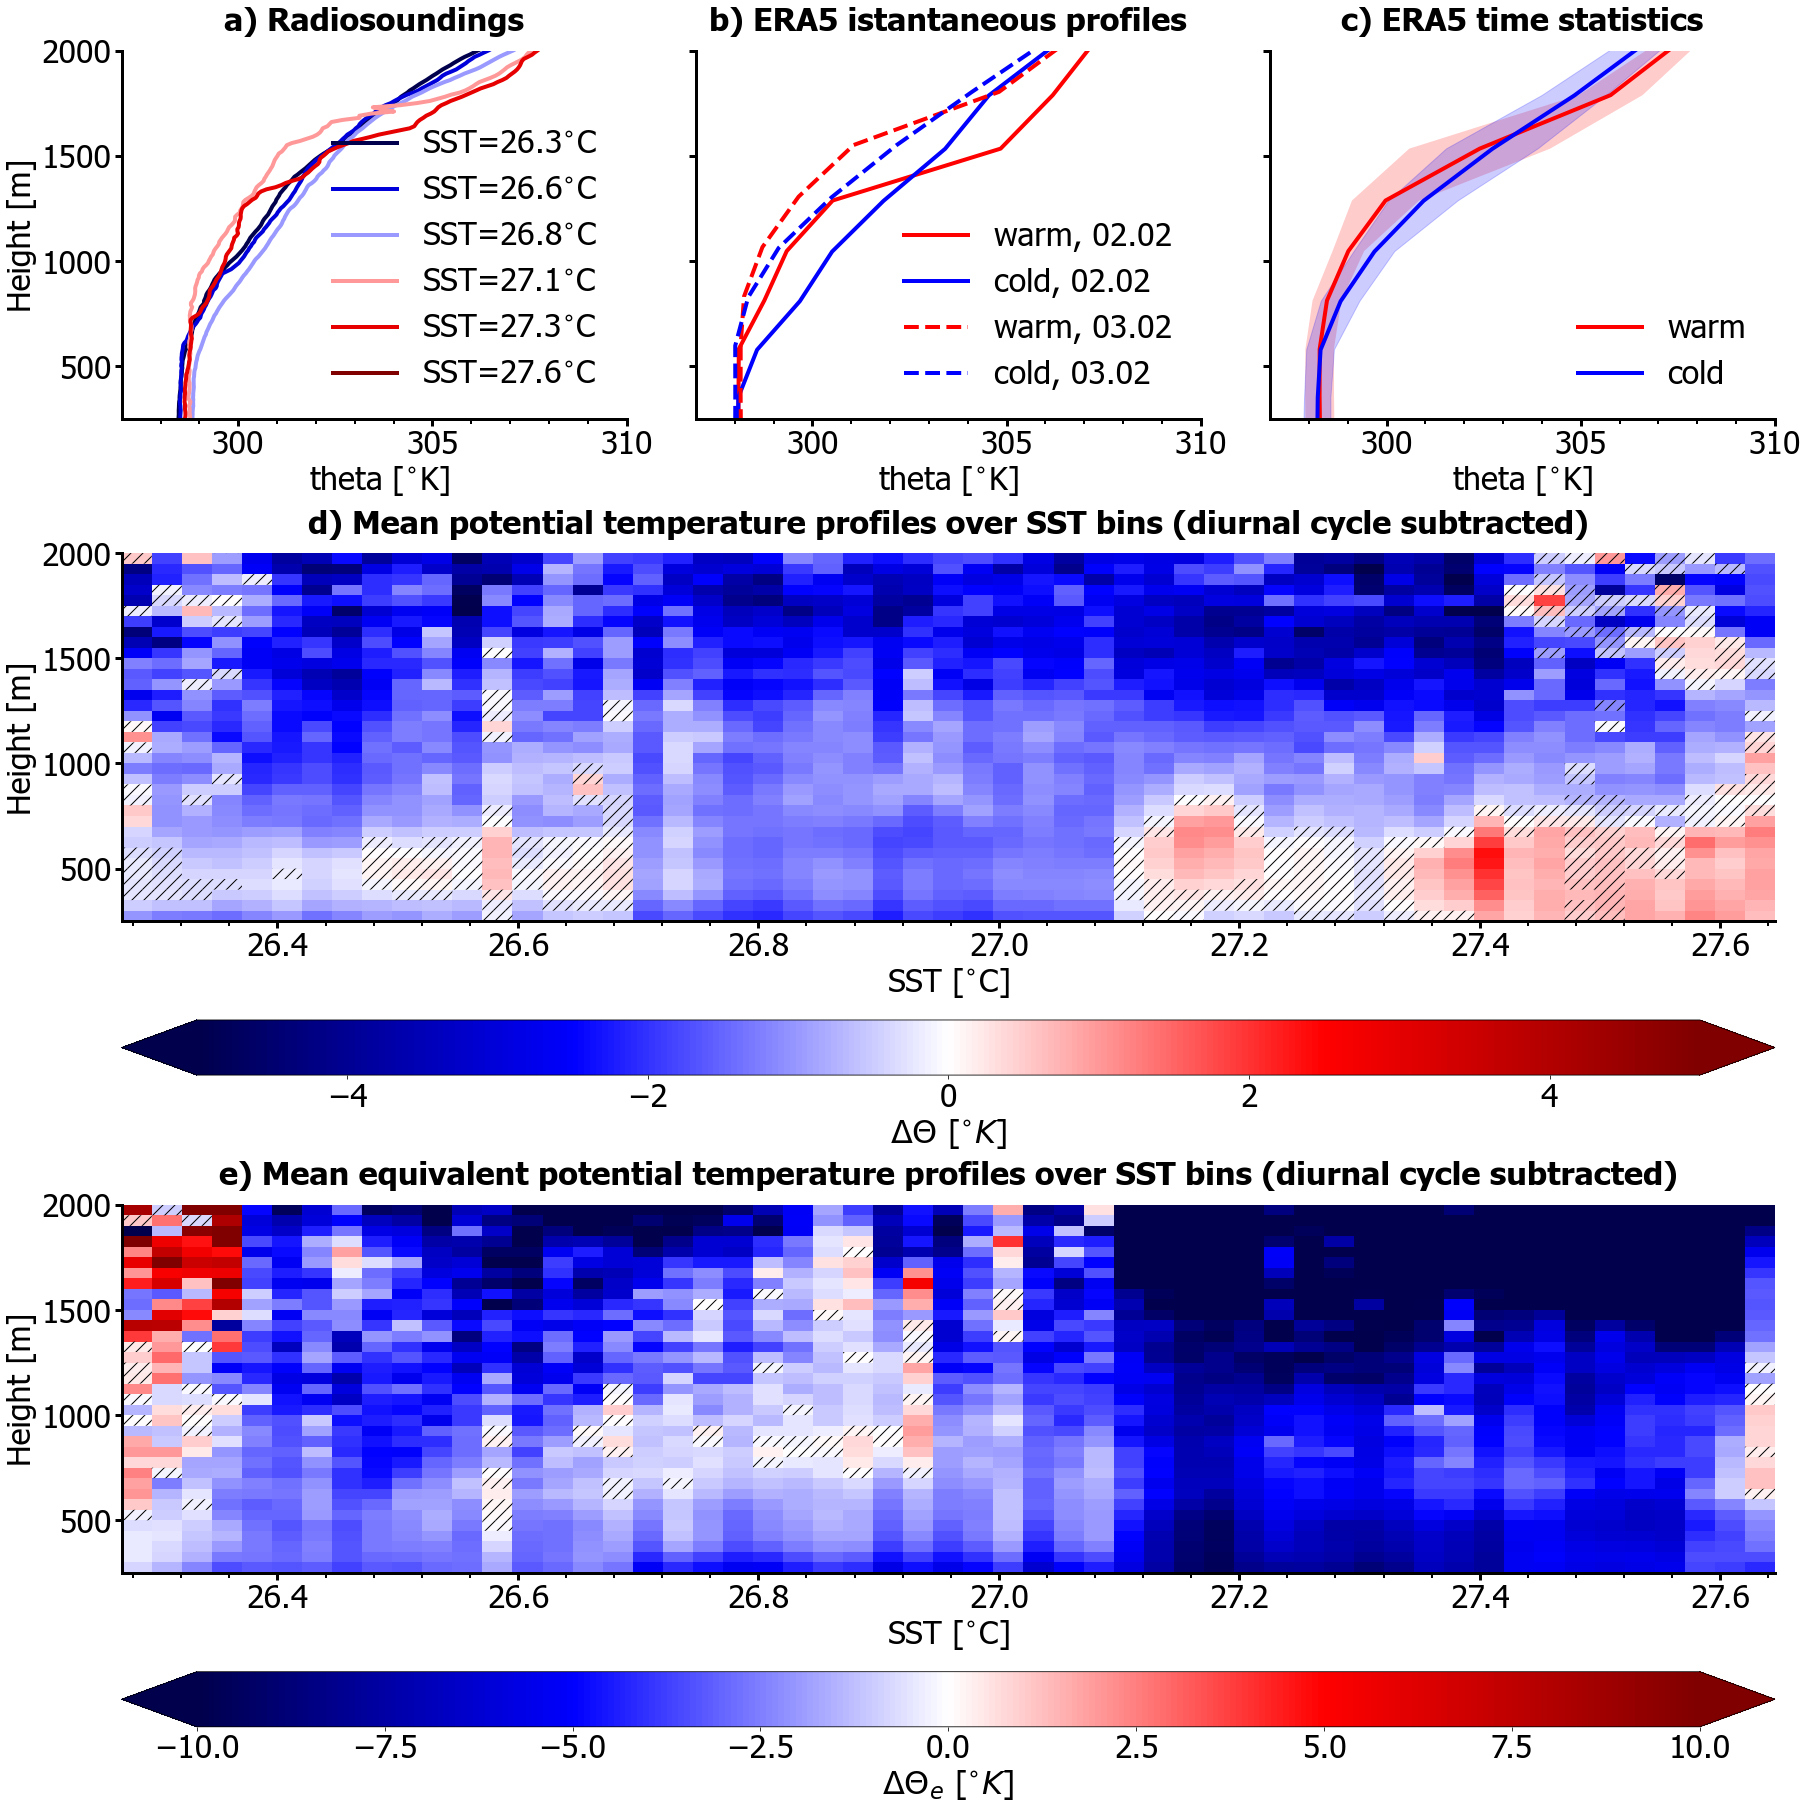

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
rcParams['axes.titlepad'] = 20 
#gs = gridspec.GridSpec(3, 3)
fig, axs = plt.subplots(3, 3, figsize=(25,25), sharey=True, constrained_layout=True)# 


#ax = fig.add_subplot(gs[0, 0])

for ind_sst_bin in range(len(binned_sst_rs)): 
    axs[0,0].plot(theta_rs[ind_sst_bin,:], height_rs, color=colors_binned_sst[ind_sst_bin], label=labels[ind_sst_bin]+'$^{\circ}$C', linewidth=4, rasterized=True)
axs[0,0].legend(frameon=False, fontsize=fontSizeX, loc='lower right')
axs[0,0].set_xlabel(" theta [$^{\circ}$K]", fontsize=fontSizeX)
axs[0,0].set_ylabel("Height [m]", fontsize=fontSizeY)
axs[0,0].set_xlim(297.,310.)
axs[0,0].spines["top"].set_visible(False)
axs[0,0].spines["right"].set_visible(False)
axs[0,0].spines["bottom"].set_linewidth(3)
axs[0,0].spines["left"].set_linewidth(3)
axs[0,0].set_title('a) Radiosoundings', fontsize=32, fontweight='black')

axs[0,0].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0,0].tick_params(which='minor', length=5, width=2)
axs[0,0].tick_params(which='major', length=7, width=3)
axs[0,0].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0,0].tick_params(axis='both', labelsize=32)
axs[0,0].set_ylim(250.,2000.)    

#-----------------------------

axs[0,1].plot(mean_w2, z_w2, color='red', linewidth=4, rasterized=True, label='warm, 02.02')
axs[0,1].plot(mean_c2, z_c2, color='blue', linewidth=4, rasterized=True, label='cold, 02.02')
axs[0,1].plot(mean_w3,z_w3,'--', color='red', linewidth=4, rasterized=True, label='warm, 03.02')
axs[0,1].plot(mean_c3,z_c3,'--', color='blue', linewidth=4, rasterized=True, label='cold, 03.02')
axs[0,1].set_xlim(297.,310.)
axs[0,1].legend(frameon=False)

axs[0,1].spines["top"].set_visible(False)
axs[0,1].spines["right"].set_visible(False)
axs[0,1].spines["bottom"].set_linewidth(3)
axs[0,1].spines["left"].set_linewidth(3)
axs[0,1].set_title('b) ERA5 istantaneous profiles', fontsize=32, fontweight='black')
axs[0,1].set_xlabel("theta [$^{\circ}$K]", fontsize=fontSizeX)

axs[0,1].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0,1].tick_params(which='minor', length=5, width=2)
axs[0,1].tick_params(which='major', length=7, width=3)
axs[0,1].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0,1].tick_params(axis='both', labelsize=32)
axs[0,1].set_ylim(250.,2000.)

#-----------------------------

axs[0,2].plot(mean_w,z_w,'r', linewidth=4, rasterized=True, label='warm')
axs[0,2].plot(mean_c,z_c,color='blue', linewidth=4, rasterized=True, label='cold')
axs[0,2].fill(np.append(mean_w-std_w, np.flip(mean_w+std_w)),np.append(z_w, np.flip(z_w)),'r',alpha=0.2)
axs[0,2].fill(np.append(mean_c-std_c, np.flip(mean_c+std_c)),np.append(z_c, np.flip(z_c)),color='blue',alpha=0.2)
axs[0,2].set_xlim(297.,310.)
axs[0,2].legend(frameon=False)
axs[0,2].spines["top"].set_visible(False)
axs[0,2].spines["right"].set_visible(False)
axs[0,2].spines["bottom"].set_linewidth(3)
axs[0,2].spines["left"].set_linewidth(3)
axs[0,2].set_title('c) ERA5 time statistics', fontsize=32, fontweight='black')
axs[0,2].set_xlabel("theta [$^{\circ}$K]", fontsize=fontSizeX)

axs[0,2].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0,2].tick_params(which='minor', length=5, width=2)
axs[0,2].tick_params(which='major', length=7, width=3)
axs[0,2].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0,2].tick_params(axis='both', labelsize=32)
axs[0,2].set_ylim(250.,2000.)

#-----------------------------
gs = axs[1, 0].get_gridspec()
# remove the underlying axes
for ax in axs[1, :]:
    ax.remove()
axbig = fig.add_subplot(gs[1, :])
axbig.spines["top"].set_visible(False)
axbig.spines["right"].set_visible(False)
axbig.spines["bottom"].set_linewidth(3)
axbig.spines["left"].set_linewidth(3)
axbig.set_title('d) Mean potential temperature profiles over SST bins (diurnal cycle subtracted)', fontsize=32, fontweight='black')

axbig.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axbig.tick_params(which='minor', length=5, width=2)
axbig.tick_params(which='major', length=7, width=3)
axbig.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axbig.tick_params(axis='both', labelsize=32)
axbig.set_ylim(250.,2000.)
mesh = axbig.pcolormesh(sst_arr, height, theta_data.T, cmap='seismic', vmin=-5., vmax=5.)
axbig.pcolor(sst_arr, height, masked_theta.T, hatch='//', alpha=0.)

cbar = fig.colorbar(mesh, ax=axbig, orientation='horizontal', extend='both', aspect=30)
cbar.set_label(label='$\Delta\Theta$ [$^{\circ}K$]',  size=fontSizeX)
axbig.set_ylabel('Height [m]', fontsize=fontSizeX)
axbig.set_xlabel('SST [$^{\circ}$C]', fontsize=fontSizeX)

#-----------------------------
gs = axs[2, 0].get_gridspec()
# remove the underlying axes
for ax in axs[2, :]:
    ax.remove()
axbig = fig.add_subplot(gs[2, :])
axbig.spines["top"].set_visible(False)
axbig.spines["right"].set_visible(False)
axbig.spines["bottom"].set_linewidth(3)
axbig.spines["left"].set_linewidth(3)
axbig.set_title('e) Mean equivalent potential temperature profiles over SST bins (diurnal cycle subtracted)', fontsize=32, fontweight='black')

axbig.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axbig.tick_params(which='minor', length=5, width=2)
axbig.tick_params(which='major', length=7, width=3)
axbig.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axbig.tick_params(axis='both', labelsize=32)
axbig.set_ylim(250.,2000.)
mesh = axbig.pcolormesh(sst_arr, height, theta_e_data.T, cmap='seismic', vmin=-10., vmax=10.)
axbig.pcolor(sst_arr, height, masked_theta_e.T, hatch='//', alpha=0.)

cbar = fig.colorbar(mesh, ax=axbig, orientation='horizontal', extend='both', aspect=30)
cbar.set_label(label='$\Delta\Theta_e$ [$^{\circ}K$]',  size=fontSizeX)
axbig.set_ylabel('Height [m]', fontsize=fontSizeX)
axbig.set_xlabel('SST [$^{\circ}$C]', fontsize=fontSizeX)


fig.savefig(path_out_plots+'figure_theta_theta_e.png', format='png')

In [12]:
# plot of theta and theta_e anomaly time series
data_path = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/post_processed_data/diurnal_cycle_removed/'

# reading original variables
theta_e_list = [data_path+'theta_e_20200202.nc', data_path+'theta_e_20200203.nc']
theta_list = [data_path+'theta_20200202.nc', data_path+'theta_20200203.nc']

# read the two datasets together
theta_e_dataset = xr.open_mfdataset(theta_e_list)
theta_dataset = xr.open_mfdataset(theta_list)

theta_e_anomaly = theta_e_dataset.product_no_diurnal_cycle.values
theta_anomaly = theta_dataset.product_no_diurnal_cycle.values

# read SST temperature
# reading tsg file ( data with 1 min resolution)
tsg_file = "/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/tsg_sst_data/tsg/nc/msm_089_1_tsg.nc"

tsg_data = xr.open_dataset(tsg_file)

# identifying time stamps of sst corresponding to time stamps of radiosondes
t_start = datetime(2020, 2, 2, 0, 0, 0)
t_end = datetime(2020, 2, 3, 23, 59, 59)

# slicing tsg datase t for the selected time interval and extracting sst
sliced_tsg_ds = tsg_data.sel(TIME=slice(t_start, t_end))
tsg_sst = sliced_tsg_ds['TEMP'].values
tsg_time_sst = sliced_tsg_ds['TIME'].values
tsg_flag = sliced_tsg_ds['TEMP_QC'].values

# averaging together the sst of the different sst sensors for tsg
temp0 = sliced_tsg_ds.TEMP[:,0].values
temp1 = sliced_tsg_ds.TEMP[:,1].values
sst_tsg = temp0
sst_tsg[np.isnan(temp0)] = temp1[np.isnan(temp0)]

# producing output dataset of sst_tsg for the selected time window
# creating dataset with coordinates sst and height
dim_sst           = ['time']
coords         = {"time":sliced_tsg_ds.TIME.values}
SST              = xr.DataArray(dims=dim_sst, coords=coords, data=sst_tsg,
                 attrs={'long_name':'sea surface temperature ',
                        'units':'$^{\circ}$C'})
variables         = {'SST':SST}
SST_DS      = xr.Dataset(data_vars = variables,
                       coords = coords)

# opening noise mask file to read cloud base
noise_mask_file = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/noise_mask.nc'
noise_mask = xr.open_dataset(noise_mask_file)
noise_mask = noise_mask.sel(Time=slice(datetime(2020,2,2,0,0,0), datetime(2020,2,3,23,59,59)))

cloud_base = noise_mask.cloud_base_height.values


In [39]:
noise_mask

<xarray.Dataset>
Dimensions:            (Height: 375, Time: 16617)
Coordinates:
  * Time               (Time) datetime64[ns] 2020-02-02T00:00:08 ... 2020-02-...
  * Height             (Height) float32 198.75 206.25 213.75 ... 2996.25 3003.75
Data variables:
    noise_mask         (Time, Height) float64 ...
    cloud_base_height  (Time) float32 2056.25 2078.75 2026.25 ... 128.75 2528.75
Attributes:
    CREATED_BY:        Claudia Acquistapace
    CREATED_ON:        2021-12-08 11:06:12.835374
    FILL_VALUE:        NaN
    PI_NAME:           Claudia Acquistapace
    PI_AFFILIATION:    University of Cologne (UNI), Germany
    PI_ADDRESS:        Institute for geophysics and meteorology, Pohligstrass...
    PI_MAIL:           cacquist@meteo.uni-koeln.de
    DO_NAME:           University of Cologne - Germany
    DO_AFFILIATION:    University of Cologne - Germany
    DO_address:        Institute for geophysics and meteorology, Pohligstrass...
    DO_MAIL:           cacquist@meteo.uni-koeln.de
    DS_NAME:           University of Cologne - Germany
    DS_AFFILIATION:    University of Cologne - Germany
    DS_address:        Institute for geophysics and meteorology, Pohligstrass...
    DS_MAIL:           cacquist@meteo.uni-koeln.de
    DATA_DESCRIPTION:  mask for signal above cloud base at arthus time resolu...
    DATA_DISCIPLINE:   Atmospheric Physics - Remote Sensing Radar Profiler
    DATA_GROUP:        Experimental;Profile;Moving
    DATA_SOURCE:       arthus data
    DATA_PROCESSING:   https://github.com/ClauClouds/SST-impact/
    INSTRUMENT_MODEL:  arthus raman lidar system
    COMMENT:           data postprocessed by Diego Lange

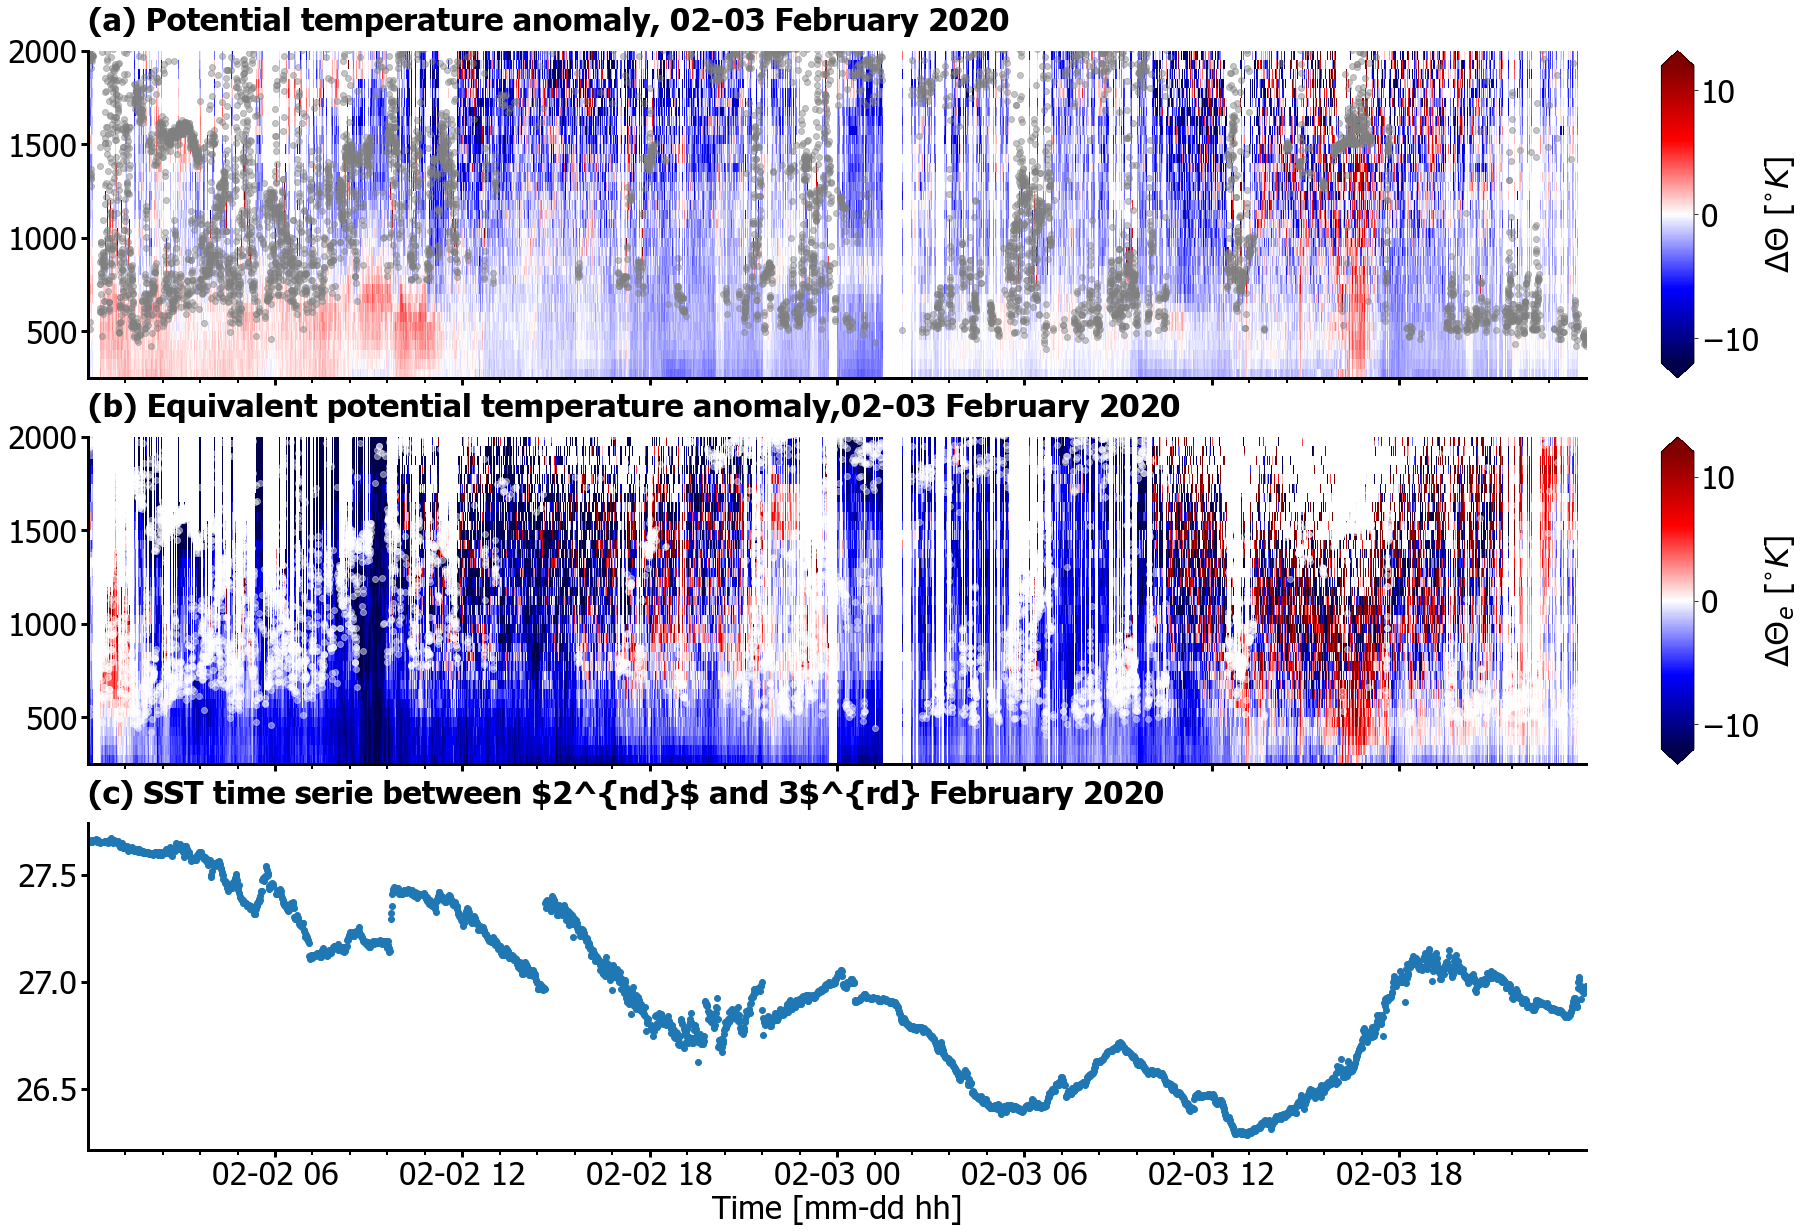

In [38]:
rcParams['axes.titlepad'] = 20
fig, axs = plt.subplots(3, 1, figsize=(25,17), sharex=True, constrained_layout=True)# 

axs[0].set_title('(a) Potential temperature anomaly, 02-03 February 2020',\
                 fontweight='black', fontsize=fontSizeX, loc='left')
mesh1 = axs[0].pcolormesh(theta_dataset.time.values,\
                         theta_dataset.height.values, \
                         theta_anomaly.T, cmap='seismic', vmin=-12., vmax=12.)
axs[0].scatter(noise_mask.Time.values, cloud_base, color='grey', alpha=0.45)
axs[0].set_ylim(250., 2000)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].spines["bottom"].set_linewidth(3)
axs[0].spines["left"].set_linewidth(3)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0].tick_params(which='minor', length=5, width=2)
axs[0].tick_params(which='major', length=7, width=3)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0].tick_params(axis='both', labelsize=32)
cbar = fig.colorbar(mesh1, ax=axs[0], orientation='vertical', extend='both', aspect=10)
cbar.set_label(label='$\Delta\Theta$ [$^{\circ}K$]',  size=fontSizeX)

axs[1].set_title('(b) Equivalent potential temperature anomaly,02-03 February 2020', \
                 fontweight='black', fontsize=fontSizeX, loc='left')

mesh2 = axs[1].pcolormesh(theta_e_dataset.time.values,\
                         theta_e_dataset.height.values, \
                         theta_e_anomaly.T, cmap='seismic', vmin=-12., vmax=12.)
axs[1].scatter(noise_mask.Time.values, cloud_base, color='white', alpha=0.45)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["bottom"].set_linewidth(3)
axs[1].spines["left"].set_linewidth(3)
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[1].tick_params(which='minor', length=5, width=2)
axs[1].tick_params(which='major', length=7, width=3)
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[1].tick_params(axis='both', labelsize=32)
axs[1].set_ylim(250., 2000)
cbar = fig.colorbar(mesh2, ax=axs[1], orientation='vertical', extend='both', aspect=10)
cbar.set_label(label='$\Delta\Theta_e$ [$^{\circ}K$]',  size=fontSizeX)


axs[2].scatter(SST_DS.time.values, SST_DS.SST.values)
axs[2].set_title('(c) SST time serie between $2^{nd}$ and 3$^{rd} February 2020',\
                 fontweight='black', fontsize=fontSizeX, loc='left')
axs[2].spines["top"].set_visible(False)
axs[2].spines["right"].set_visible(False)
axs[2].spines["bottom"].set_linewidth(3)
axs[2].spines["left"].set_linewidth(3)
axs[2].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[2].tick_params(which='minor', length=5, width=2)
axs[2].tick_params(which='major', length=7, width=3)
axs[2].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[2].tick_params(axis='both', labelsize=32)
axs[2].set_xlabel('Time [mm-dd hh]')

fig.savefig(path_out_plots+'figure_timeserie_theta_theta_e.png', format='png')